In [1]:
import import_ipynb
import numpy as np
from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeWashingtonV2
from qiskit_ibm_runtime import SamplerV2, Batch
from qiskit_aer.primitives import EstimatorV2

from collections import defaultdict
import matplotlib.pyplot as plt

from functions import *

In [2]:
num_shots = 1024**2

In [3]:
np.random.seed(1)

### prep

In [4]:
# create test circuit: 2 qubits, 1 CNOT
qc_1 = QuantumCircuit(2, 1)
qc_1.append(test_circuit_1(), range(2))
qc_1.decompose()
qc_1.measure_all()
qc_1 = qc_1.decompose()

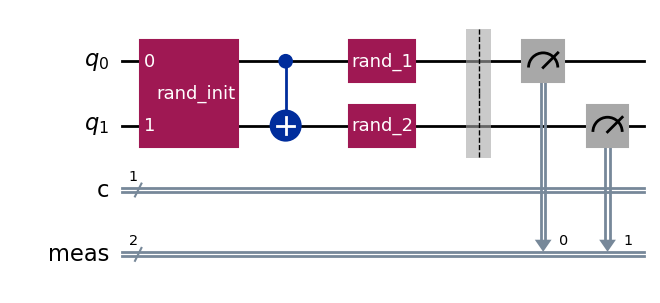

In [5]:
qc_1.draw('mpl')

In [6]:
# create test circuit: 2 qubits, 3 CNOTs
qc_2 = QuantumCircuit(2, 3)
qc_2.append(test_circuit_2(), range(2))
qc_2.decompose()
qc_2.measure_all()
qc_2 = qc_2.decompose()

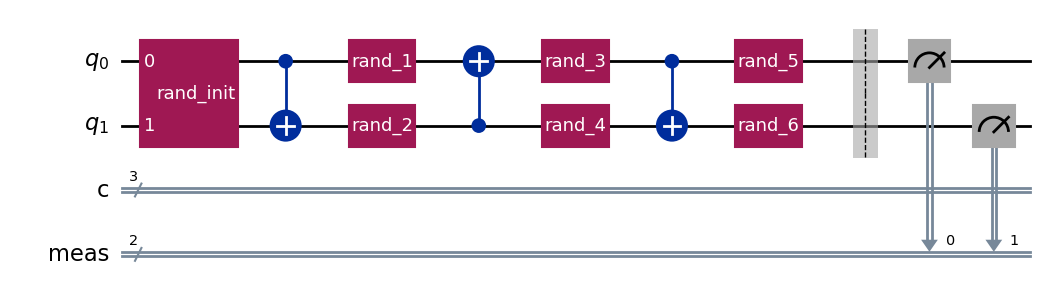

In [7]:
qc_2.draw('mpl')

In [8]:
# create test circuit: 3 qubits, 3 CNOTS
qc_3 = QuantumCircuit(3, 3)
qc_3.append(test_circuit(), range(3))
qc_3.decompose()
qc_3.measure_all()
qc_3 = qc_3.decompose()

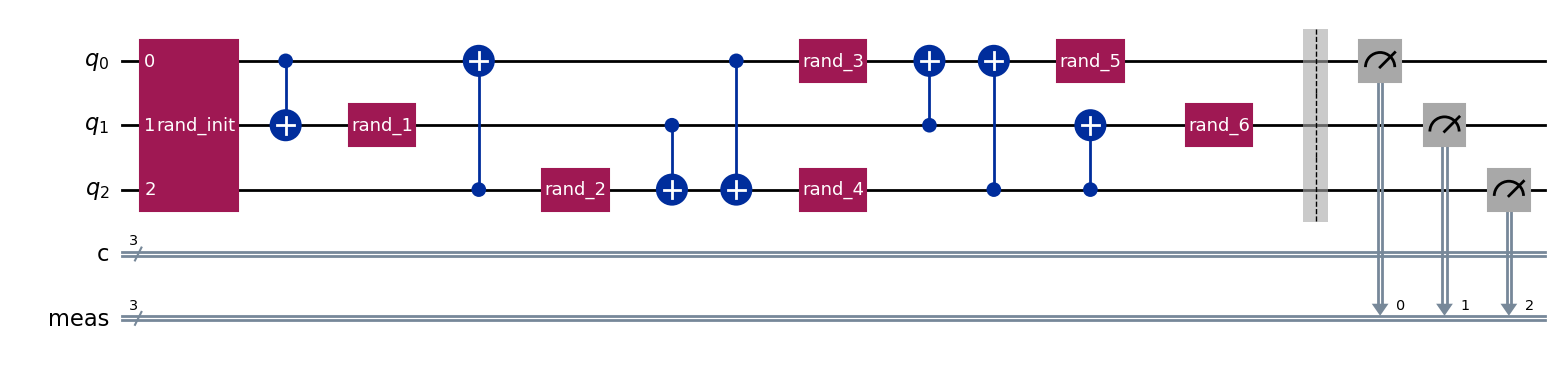

In [9]:
qc_3.draw('mpl')

# test circuit 1

## no noise

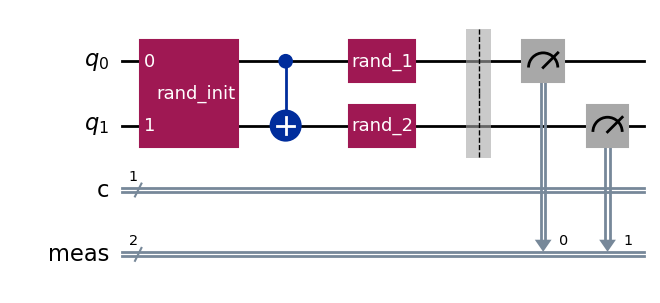

In [10]:
qc_1.draw('mpl')

In [11]:
# qc_1, no noise, not knitted, 1024,...,1024**2 shots
qc_1_no_knit_no_noise = defaultdict(dict)
for i in range(0, 11):
    shots = 1024*2**i
    qc_1_no_knit_no_noise[str(shots)] = do_run(qc_1, shots, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))

In [ ]:
# qc_1, no noise, knitted, 1024,...,1024**2 shots
qc_1_knitted_no_noise = defaultdict(dict)
for i in range(0, 11):
    shots = 1024*2**i
    qc_1_knitted_no_noise[str(shots)] = circuit_knitter(qc_1, 0, 1, shots, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))

In [ ]:
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_no_noise[str(1024*2**i)]['00']/(1024*2**i) for i in range(0, 11)],\
             color='tab:blue', alpha=0.9, label = '00; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_no_noise[str(1024*2**i)]['00']/(1024*2**i) for i in range(0, 11)],\
             color='tab:blue', linestyle = 'dashed', label = '00; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_no_noise[str(1024*2**i)]['01']/(1024*2**i) for i in range(0, 11)],\
             color='tab:orange', alpha=0.9, label = '01; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_no_noise[str(1024*2**i)]['01']/(1024*2**i) for i in range(0, 11)],\
             color='tab:orange', linestyle = 'dashed', label = '01; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_no_noise[str(1024*2**i)]['10']/(1024*2**i) for i in range(0, 11)],
             color='tab:green', alpha=0.9, label = '10; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_no_noise[str(1024*2**i)]['10']/(1024*2**i) for i in range(0, 11)],\
             color='tab:green', linestyle = 'dashed', label = '10; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_no_noise[str(1024*2**i)]['11']/(1024*2**i) for i in range(0, 11)],
             color='tab:red', alpha=0.9, label = '11; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_no_noise[str(1024*2**i)]['11']/(1024*2**i) for i in range(0, 11)],\
             color='tab:red', linestyle = 'dashed', label = '11; knitted')

plt.xlabel('Shots')
plt.ylabel('proportion')
plt.title('2 qubits, 1 CNOT, no noise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## noisy

In [ ]:
# qc_1, with noise, not knitted, 1024,...,1024**2 shots
qc_1_no_knit_noise = defaultdict(dict)
for i in range(0, 11):
    shots = 1024*2**i
    qc_1_no_knit_noise[str(shots)] = do_run(qc_1, shots, noise=True, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))

In [ ]:
# qc_1, with noise, knitted, 1024,...,1024**2 shots
qc_1_knitted_noise = defaultdict(dict)
for i in range(0, 11):
    shots = 1024*2**i
    qc_1_knitted_noise[str(shots)] = circuit_knitter(qc_1, 0, 1, shots, noise=True, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))

In [ ]:
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_noise[str(1024*2**i)]['00']/(1024*2**i) for i in range(0, 11)],\
             color='tab:blue', alpha=0.9, label = '00; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_noise[str(1024*2**i)]['00']/(1024*2**i) for i in range(0, 11)],\
             color='tab:blue', linestyle = 'dashed', label = '00; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_noise[str(1024*2**i)]['01']/(1024*2**i) for i in range(0, 11)],\
             color='tab:orange', alpha=0.9, label = '01; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_noise[str(1024*2**i)]['01']/(1024*2**i) for i in range(0, 11)],\
             color='tab:orange', linestyle = 'dashed', label = '01; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_noise[str(1024*2**i)]['10']/(1024*2**i) for i in range(0, 11)],
             color='tab:green', alpha=0.9, label = '10; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_noise[str(1024*2**i)]['10']/(1024*2**i) for i in range(0, 11)],\
             color='tab:green', linestyle = 'dashed', label = '10; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_noise[str(1024*2**i)]['11']/(1024*2**i) for i in range(0, 11)],
             color='tab:red', alpha=0.9, label = '11; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_noise[str(1024*2**i)]['11']/(1024*2**i) for i in range(0, 11)],\
             color='tab:red', linestyle = 'dashed', label = '11; knitted')

plt.xlabel('Shots')
plt.ylabel('proportion')
plt.title('2 qubits, 1 CNOT, with noise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# test circuit 2

## no noise

In [ ]:
# qc_2, no noise, not knitted, num_shots shots
qc_2_no_knit_no_noise_1048576 = do_run(qc_2, num_shots, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_2_no_knit_no_noise_1048576)
print({key: qc_2_no_knit_no_noise_1048576[key]/num_shots for key in qc_2_no_knit_no_noise_1048576})

In [ ]:
# qc_2, no noise, knitted, num_shots shots
qc_2_knitted_no_noise_1048576 = circuit_knitter(qc_2, 0, 1, num_shots, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_2_knitted_no_noise_1048576)
print({key: qc_2_knitted_no_noise_1048576[key]/num_shots for key in qc_2_knitted_no_noise_1048576})

In [ ]:
plt.scatter(np.linspace(0.975, 3.975, 4), {key: qc_2_no_knit_no_noise_1048576[key]/num_shots for key in qc_2_no_knit_no_noise_1048576}.values(), label='no knit')
plt.scatter(np.linspace(1.025, 4.025, 4), {key: qc_2_knitted_no_noise_1048576[key]/num_shots for key in qc_2_knitted_no_noise_1048576}.values(), marker='v', label='knitted')
plt.xticks(ticks=[*range(1,5)], labels=['00', '01', '10', '11'])
plt.xlabel('outcome')
plt.ylabel('proportion')
plt.title('2 qubits, 3 CNOTs, no noise')
plt.legend()
plt.show()

## noisy

In [ ]:
# qc_2, noise, not knitted, num_shots shots
qc_2_no_knit_noise_1048576 = do_run(qc_2, num_shots, noise=True, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_2_no_knit_noise_1048576)
print({key: qc_2_no_knit_noise_1048576[key]/num_shots for key in qc_2_no_knit_noise_1048576})

In [ ]:
# qc_2, noise, knitted, num_shots shots
qc_2_knitted_noise_1048576 = circuit_knitter(qc_2, 0, 1, num_shots, noise=True, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_2_knitted_noise_1048576)
print({key: qc_2_knitted_noise_1048576[key]/num_shots for key in qc_2_knitted_noise_1048576})

In [ ]:
plt.scatter(np.linspace(0.975, 3.975, 4), {key: qc_2_no_knit_noise_1048576[key]/num_shots for key in qc_2_knitted_noise_1048576}.values(), label='no knit')
plt.scatter(np.linspace(1.025, 4.025, 4), {key: qc_2_knitted_noise_1048576[key]/num_shots for key in qc_2_knitted_noise_1048576}.values(), marker='v', label='knitted')
plt.xticks(ticks=[*range(1,5)], labels=['00', '01', '10', '11'])
plt.xlabel('outcome')
plt.ylabel('proportion')
plt.title('2 qubits, 3 CNOTs, with noise')
plt.legend()
plt.show()

# test circuit 3 

## no noise

In [ ]:
# qc_3, no noise, not knitted, num_shots shots
qc_3_no_knit_no_noise_1048576 = do_run(qc_3, num_shots, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_3_no_knit_no_noise_1048576)
print({key: qc_3_no_knit_no_noise_1048576[key]/num_shots for key in qc_3_no_knit_no_noise_1048576})

In [ ]:
# qc_3, no noise, knitted (0 and 1), num_shots shots
qc_3_knitted_01_no_noise_1048576 = circuit_knitter(qc_3, 0, 1, num_shots, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_3_knitted_01_no_noise_1048576)
print({key: qc_3_knitted_01_no_noise_1048576[key]/num_shots for key in qc_3_knitted_01_no_noise_1048576})

In [ ]:
# qc_3, no noise, knitted (0 and 2), num_shots shots
qc_3_knitted_02_no_noise_1048576 = circuit_knitter(qc_3, 0, 2, num_shots, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_3_knitted_02_no_noise_1048576)
print({key: qc_3_knitted_02_no_noise_1048576[key]/num_shots for key in qc_3_knitted_02_no_noise_1048576})

In [ ]:
# qc_3, no noise, knitted (1 and 2), num_shots shots
qc_3_knitted_12_no_noise_1048576 = circuit_knitter(qc_3, 1, 2, num_shots, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_3_knitted_12_no_noise_1048576)
print({key: qc_3_knitted_12_no_noise_1048576[key]/num_shots for key in qc_3_knitted_12_no_noise_1048576})

In [ ]:
plt.scatter(np.linspace(0.85, 7.85, 8), {key: qc_3_no_knit_no_noise_1048576[key]/num_shots for key in qc_3_no_knit_no_noise_1048576}.values(),\
            label='no knit')
plt.scatter(np.linspace(0.95, 7.95, 8), {key: qc_3_knitted_01_no_noise_1048576[key]/num_shots for key in qc_3_knitted_01_no_noise_1048576}.values(),\
            marker='v', label='knitted (0, 1)')
plt.scatter(np.linspace(1.05, 8.05, 8), {key: qc_3_knitted_02_no_noise_1048576[key]/num_shots for key in qc_3_knitted_02_no_noise_1048576}.values(),\
            marker='^', label='knitted (0, 2)')
plt.scatter(np.linspace(1.15, 8.15, 8), {key: qc_3_knitted_12_no_noise_1048576[key]/num_shots for key in qc_3_knitted_12_no_noise_1048576}.values(),\
            marker='s', label='knitted (1, 2)')
plt.xticks(ticks=[*range(1,9)], labels=['000', '001', '010', '011', '100', '101', '110', '111'])
plt.xlabel('outcome')
plt.ylabel('proportion')
plt.title('3 qubits, 3 CNOTs, no noise')
plt.legend()
plt.show()

## noisy

In [ ]:
# qc_3, noise, not knitted, num_shots shots
qc_3_no_knit_noise_1048576 = do_run(qc_3, num_shots, noise=True, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_3_no_knit_noise_1048576)
print({key: qc_3_no_knit_noise_1048576[key]/num_shots for key in qc_3_no_knit_noise_1048576})

In [ ]:
# qc_3, noise, knitted (0 and 1), num_shots shots
qc_3_knitted_01_noise_1048576 = circuit_knitter(qc_3, 0, 1, num_shots, noise=True, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_3_knitted_01_noise_1048576)
print({key: qc_3_knitted_01_noise_1048576[key]/num_shots for key in qc_3_knitted_01_noise_1048576})

In [ ]:
# qc_3, noise, knitted (0 and 2), num_shots shots
qc_3_knitted_02_noise_1048576 = circuit_knitter(qc_3, 0, 2, num_shots, noise=True, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_3_knitted_02_noise_1048576)
print({key: qc_3_knitted_02_noise_1048576[key]/num_shots for key in qc_3_knitted_02_noise_1048576})

In [ ]:
# qc_3, noise, knitted (1 and 2), num_shots shots
qc_3_knitted_12_noise_1048576 = circuit_knitter(qc_3, 0, 2, num_shots, noise=True, simulator_seed=np.random.randint(1024**2),\
                                                     transpiler_seed=np.random.randint(1024**2))
print(qc_3_knitted_12_noise_1048576)
print({key: qc_3_knitted_12_noise_1048576[key]/num_shots for key in qc_3_knitted_12_noise_1048576})

In [ ]:
plt.scatter(np.linspace(0.85, 7.85, 8), {key: qc_3_no_knit_noise_1048576[key]/num_shots for key in qc_3_no_knit_noise_1048576}.values(),\
            label='no knit')
plt.scatter(np.linspace(0.95, 7.95, 8), {key: qc_3_knitted_01_noise_1048576[key]/num_shots for key in qc_3_knitted_01_noise_1048576}.values(),\
            marker='v', label='knitted (0, 1)')
plt.scatter(np.linspace(1.05, 8.05, 8), {key: qc_3_knitted_02_noise_1048576[key]/num_shots for key in qc_3_knitted_02_noise_1048576}.values(),\
            marker='^', label='knitted (0, 2)')
plt.scatter(np.linspace(1.15, 8.15, 8), {key: qc_3_knitted_12_noise_1048576[key]/num_shots for key in qc_3_knitted_12_noise_1048576}.values(),\
            marker='s', label='knitted (1, 2)')
plt.xticks(ticks=[*range(1,9)], labels=['000', '001', '010', '011', '100', '101', '110', '111'])
plt.xlabel('outcome')
plt.ylabel('proportion')
plt.title('3 qubits, 3 CNOTs, noise')
plt.legend()
plt.show()